In [1]:
import numpy as np
import scipy as sp
import scipy.stats as stats

import matplotlib.pyplot as plt
%matplotlib inline

# Created by Diana Janik and Jan Markiewicz

In [2]:
import torch 
import torchvision


## Zadanie 1

Wytrenuj sieć na danych  z pliku `reg_data_noise.npy`. 

In [3]:
data = np.load('reg_data_noise.npy')

In [4]:
xs = data[:,0]
ys = data[:,1]

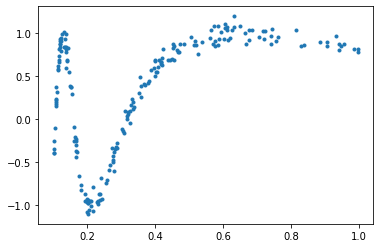

In [5]:
plt.plot(xs,ys,'.');

In [6]:
model = torch.nn.Sequential(torch.nn.Linear(1,25),
                    torch.nn.Dropout(0.02),
                    torch.nn.ReLU(), 
                    torch.nn.Linear(25,50),
                    torch.nn.Dropout(0.03),
#                     torch.nn.ReLU6(),         
#                     torch.nn.Linear(50,5), 
                    torch.nn.ReLU(), 
                    torch.nn.Linear(50,1))

In [7]:
t_xs = torch.from_numpy(xs).view(-1,1)
t_ys = torch.from_numpy(ys).view(-1,1)

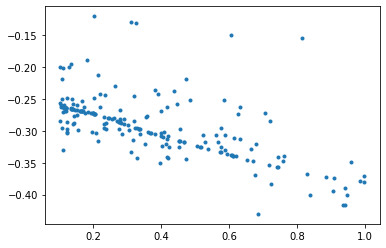

In [8]:
t_out = model(t_xs)

plt.plot(xs, t_out.data.view(-1).numpy(),'.')

In [9]:
dataset = torch.utils.data.TensorDataset(t_xs, t_ys)
(train_set, valid_set) = torch.utils.data.random_split(dataset,(160,40))

In [10]:
train_loader = torch.utils.data.DataLoader(train_set,batch_size=len(train_set))

In [11]:
optimizer = torch.optim.SGD(model.parameters(),lr =0.02)

In [12]:
loss_func = torch.nn.MSELoss()

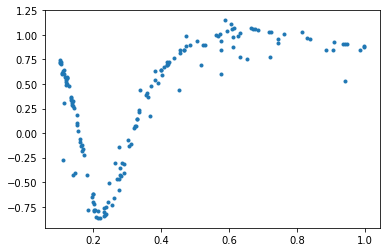

epoch 0 0.750862 0.725385 
epoch 1000 0.299321 0.256214 
epoch 2000 0.234649 0.197642 
epoch 3000 0.158060 0.131217 
epoch 4000 0.119683 0.064754 
epoch 5000 0.090929 0.079757 
epoch 6000 0.097230 0.082040 
epoch 7000 0.101845 0.108158 
epoch 8000 0.091816 0.067230 
epoch 9000 0.103160 0.072173 
epoch 10000 0.096467 0.077613 
CPU times: user 1min 17s, sys: 531 ms, total: 1min 18s
Wall time: 37.9 s


<Figure size 432x288 with 0 Axes>

In [13]:
%%time
from IPython import display
import time
err_train=[]
err_valid=[]
outputlines = []
for epoch in range(10001):    
    for datum in train_loader:
        optimizer.zero_grad()
        (features,target) = datum
        pred = model(features)
        loss = loss_func(pred, target)
        loss.backward()
        optimizer.step()
    
    with torch.no_grad():
        vpred  = model(valid_set[:][0])
        vloss  = loss_func(vpred,valid_set[:][1])
        err_valid.append(vloss)
        pred  = model(train_set[:][0])
        loss  = loss_func(pred,train_set[:][1])
        err_train.append(loss)
    if epoch%1000 == 0:
        pltX = [float(x) for [x] in train_set[:][0]]
        pltY = [float(x) for [x] in pred[:]]
        plt.plot(pltX, pltY,'.')
        display.clear_output(wait=True)
        display.display(plt.gcf())
        plt.clf()
        if epoch%1000 == 0:
            outputlines.append("epoch %d %f %f " % (epoch, loss, vloss)) 
            for line in outputlines:
                print(line)
# for line in outputlines:
#     print(line)
# time.sleep(1.0)

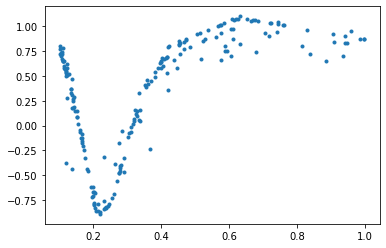

In [14]:
t_out = model(t_xs)

plt.plot(xs, t_out.data.view(-1).numpy(),'.')

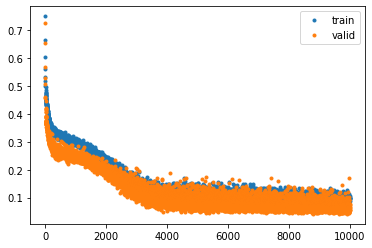

In [15]:
plt.plot(err_train, '.', label='train')
plt.plot(err_valid, '.', label='valid');
plt.legend()

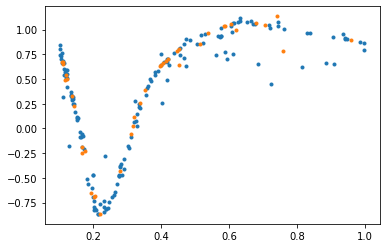

In [16]:
t_out_train = model(train_set[:][0])
plt.plot(train_set[:][0].data.numpy(), t_out_train.data.view(-1).numpy(),'.')
t_out_valid = model(valid_set[:][0])
plt.plot(valid_set[:][0].data.numpy(), t_out_valid.data.view(-1).numpy(),'.')

In [17]:
torch.save(model, "model.pt")

/home/jan/studia/datascience/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Sequential. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/jan/studia/datascience/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/jan/studia/datascience/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Dropout. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/jan/studia/datascience/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type ReLU. It won't be checked for correctness upon loading.
  "type "